# Image Analysis

**Perez Bautista David 2016351090 3CV7**

02 - Practice 2 Resizing

# INTRODUCTION
## Linear Interpolation

Linear interpolation is a widely used procedure to estimate the values that a function takes in an interval of which we know its values at the extremes (x1, f (x1)) and (x2, f (x2)). To estimate this value we use the approximation to the function f (x) by means of a line r (x) (hence the name of linear interpolation, since there is also quadratic interpolation).
The expression of the linear interpolation is obtained from the Newton interpolator polynomial of degree one:

### Linear Interpolation Straight

Let's look at the steps we have to follow to find the regression line:
1-. Given the points of the function (x1, y1) and (x2, y2), we want to estimate the value of the function at a point x in the interval x1 <x <x2.
2-. To find the interpolation line we will look at the following image.

<img src="interpolation.png" alt="header" style="height:400px;">


For this we use the similarity of the triangles ABD and CAE, obtaining the following proportionality of segments: AB / AC = BD / CE.
3-. Clearing the BD segment (since point D is the one we don't know) we get:
BD = (AB / AC) ∙ CE. Translating into algebraic language we obtain that:

<img src="y.png" alt="header" style="height:90px;">

And clearing, we get:

<img src="y1.png" alt="header" style="height:90px;">







# PRACTICE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from timeit import timeit
%matplotlib inline
from PIL import Image
%reload_ext Cython


**Using PIL and matplotlib to read and display images.**

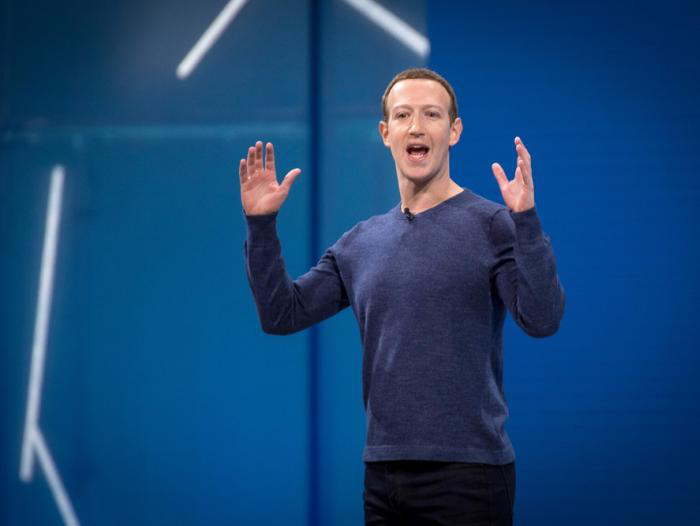

In [2]:
filepath="./" #The current directory
filename="mark.jpeg" #The File name
#filename="coins.png"
pic=Image.open(filepath+filename) #Open the image
#plt.imshow(pic) #Diplays the image in the notebook
image_format=pic.format
pic

**Converting the image as an array**

In [3]:
pic_arr = np.asarray(pic) #converts the image to an Numpy Array
pic_arr.shape #(height,width,#of channels)
print("The height value is: ",pic_arr.shape[0]," ")
print("The weight value is: ",pic_arr.shape[1]," ")

The height value is:  526  
The weight value is:  700  


**Implementing function Resizing**

In [4]:
%%cython 
import math
import numpy as np

#This function is the implementation of Linear Interpolation Straight  equation 
#Input:
#    const double x
#    const int x1
#    const unsigned char y1
#    const unsigned char y2
#Output
#    def unsigned char y
def get_y(const double x,const int x1,const unsigned char y1, const unsigned char y2):  
    cdef unsigned char y=round(((x-x1)*(y2-y1))+y1)
    return y



#This function is the implement of Linear Interpolation Straight  equation in an array 
#of one dimension 
#Input:
#    const int size 
#    const int new_size
#    const unsigned char [:] pic_arr2    

#Output
#    const unsigned char [:]  ;the size of this array is new_size

def Resizing(const int size,const int new_size,const unsigned char [:] pic_arr2):
    cdef double a=(size-1)/(new_size-1)
    cdef int i
    cdef double aux
    cdef unsigned char [:] new_arr
    new_arr=np.zeros(new_size,dtype=np.uint8)
    
    new_arr[0]=pic_arr2[0]
    new_arr[new_size-1]=pic_arr2[size-1]
    
    for i in range(1,(new_size-1)):
        aux=a*i
        new_arr[i]=get_y(aux,math.floor(aux),pic_arr2[math.floor(aux)],pic_arr2[math.floor(aux)+1])

    new_arr1=np.asarray(new_arr)
    return new_arr1

# This function create an array with the struct of an image with the height,width and channels specified
#Input:
#    const int new_height
#    const int new_weight
#    const int channels 

#Output
#    cdef unsigned char [new_height,new_weight,const int channels ] new_pic  : the values of all arrays elements are zero

def new_picture(const int new_height,const int new_width,const int channels):
    cdef int i
    cdef unsigned char [:,:,:] aux
    cdef unsigned char [:,:,:] new_pic
    aux1=np.zeros((new_height,new_width),dtype=np.uint8)
    aux=aux1[:,:,np.newaxis]
    
    new_pic1=np.zeros((new_height,new_width),dtype=np.uint8)
    new_pic=new_pic1[:,:,np.newaxis]
    
    for i in range(0,channels-1):
        new_pic=np.append(new_pic,aux,axis=2)     
     
    new_picture=np.asarray(new_pic)
    return new_picture



In [5]:
# this function resize to image whith the height and width specified
#    const int new_height
#    const int new_width
#    const int channels 
#    cdef unsigned char [:,:,:] pic_arr2

#Output
#    cdef unsigned char [new_height,new_weight,:] new_pic


def img_Resizing(new_height,new_weight,pic_arr2):
    aux=new_picture(pic_arr2.shape[0],new_width,pic_arr2.shape[2])#array with same pic_arr2 height but new width 
    new_pic=new_picture(new_height,new_width,pic_arr2.shape[2])#array with new height and new width 
    
    for channel in range(0,pic_arr2.shape[2]):
        #First resize the width of the image, 
        for i in range(0,pic_arr2.shape[0]):#pic_arr2.shape[0] is the original height picture
            aux[i,:,channel]=Resizing(pic_arr2[i,:,channel].size,new_width,pic_arr2[i,:,channel])
 
        for j in range(0,new_width):
            new_pic[:,j,channel]=Resizing(aux[:,j,channel].size,new_height,aux[:,j,channel])
    
    return new_pic


In [6]:
%%time
#Introduce new height and new width
new_height=1500
new_width=2000


new_pic=img_Resizing(new_height,new_width,pic_arr)


CPU times: user 15.6 s, sys: 11.4 ms, total: 15.6 s
Wall time: 15.6 s


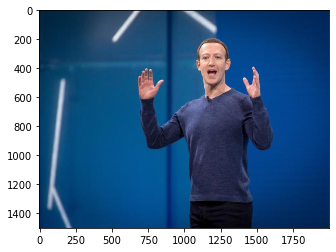

In [7]:
im=Image.fromarray(new_pic)
im.save('test.'+image_format)
plt.imshow(im)

# CONCLUTIONS

The sampling of values of an image as well as the linear interpolation give us the tools to be able to change the size of any image, however due to the interpolation the image is distorted because information is lost in the process, this is sometimes not However, if we approach very small or too large sizes, this effect can be seen better.
The algorithm is tested at the time of increasing the size of the image because it is in this case where more processing is needed due to the number of matrix elements of each channel. Cython helps to improve the speed of the algorithm, however, this cannot be reduced by a complexity O (n * m)